最优化问题：
$$ min_x f(x) $$
$x$为优化变量

#### 梯度下降法
求解：
$$ argmin_{x_1,x_2} f(x_1,x_2) = \frac{1}{2}[(x_1+x_2-4)^2 + (2x_1+3x_2-7)^2 + (4x_1+x_2-9)^2]$$

In [ ]:
# 原函数
def argminf(x1, x2):
    r = ((x1+x2-4)**2 + (2*x1+3*x2 - 7)**2 + (4*x1+x2-9)**2)*0.5
    return r


# 全量计算一阶偏导的值
def deriv_x(x1, x2):
    r1 = (x1+x2-4) + (2*x1+3*x2-7)*2 + (4*x1+x2-9)*4
    r2 = (x1+x2-4) + (2*x1+3*x2-7)*3 + (4*x1+x2-9)
    return r1, r2

# 梯度下降算法
def gradient_decs(n):
    alpha = 0.01     # 学习率
    x1, x2 = 0, 0    # 初始值
    y1 = argminf(x1, x2)
    for i in range(n):
        deriv1, deriv2 = deriv_x(x1, x2)
        x1 = x1 - alpha * deriv1
        x2 = x2 - alpha * deriv2
        y2 = argminf(x1, x2)
        if y1 - y2 < 1e-6:
            return x1, x2, y2
        if y2 < y1:
            y1 = y2
    return x1, x2, y2

# 迭代1000次结果
gradient_decs(1000)
# (1.9987027392533656, 1.092923742270406, 0.4545566995437954)

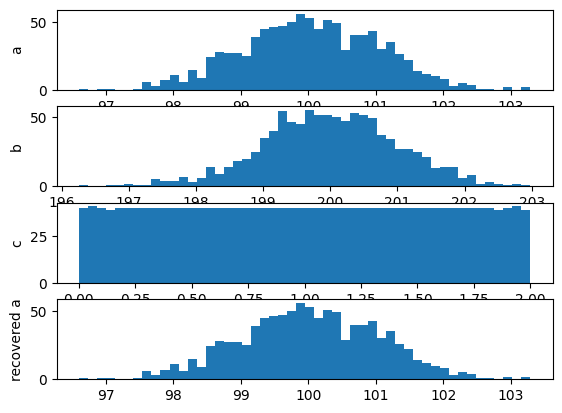

In [1]:
import scipy
from scipy import signal
from matplotlib import pyplot as plt
import numpy as np

a = scipy.stats.norm(100, 1).rvs(size=1000)
b = scipy.stats.norm(200, 1).rvs(size=1000)
c = signal.convolve(a, b)
plt.subplot(411)
plt.ylabel("a")
plt.hist(a, bins=50)

plt.subplot(412)
plt.ylabel("b")
plt.hist(b, bins=50)

plt.subplot(413)
plt.ylabel("c")
plt.hist(c, bins=50)

r,remainder=signal.deconvolve(c,b)
plt.subplot(414)
plt.ylabel("recovered a")
plt.hist(r, bins=50)

plt.show()